# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [1]:
#from Tools.tools import rec
#from Tools.tools import collection
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sns = sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

### Collection 

In [2]:
# collection()

#### 1. Importer votre DataSet

In [3]:
mydata = pd.read_csv('./Dataset/'+os.listdir('./Dataset/')[0])
mydata.shape

(100, 13)

##### Print

In [4]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,9.941398,-24.484889,-1.478570,-7.971703,-2.470608,-8.027298,-3.567422,-5.001823,-2.378043,2.369801,3.967911,1.400145,0.0
1,9.799164,-31.615510,-4.525482,-11.624347,-3.215132,-6.179778,-0.660283,-2.051269,-1.684845,0.215361,0.768086,-1.691669,1.0
2,10.119382,-31.544456,-3.194658,-9.001890,-0.731254,-4.902944,-1.061813,-4.255388,-5.261812,-4.463708,-3.450274,-3.169459,2.0
3,10.354260,-29.990822,-2.728523,-10.392988,-4.091374,-9.489000,-3.767187,-2.098165,0.520167,2.767215,3.634315,-0.445441,3.0
4,9.814093,-32.553753,-7.042249,-11.538412,-3.070324,-8.158254,-1.606384,-3.610648,-4.453116,-3.432150,-0.601025,0.597645,4.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [5]:
#mydata.describe()
#mydata.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
mydata.isna().any()

Fe1       False
Fe2       False
Fe3       False
Fe4       False
Fe5       False
Fe6       False
Fe7       False
Fe8       False
Fe9       False
Fe10      False
Fe11      False
Fe12      False
Target    False
dtype: bool

#### 3. Visualiser les targets

0     0.0
1     1.0
2     2.0
3     3.0
4     4.0
     ... 
95    5.0
96    6.0
97    7.0
98    8.0
99    9.0
Name: Target, Length: 100, dtype: float64


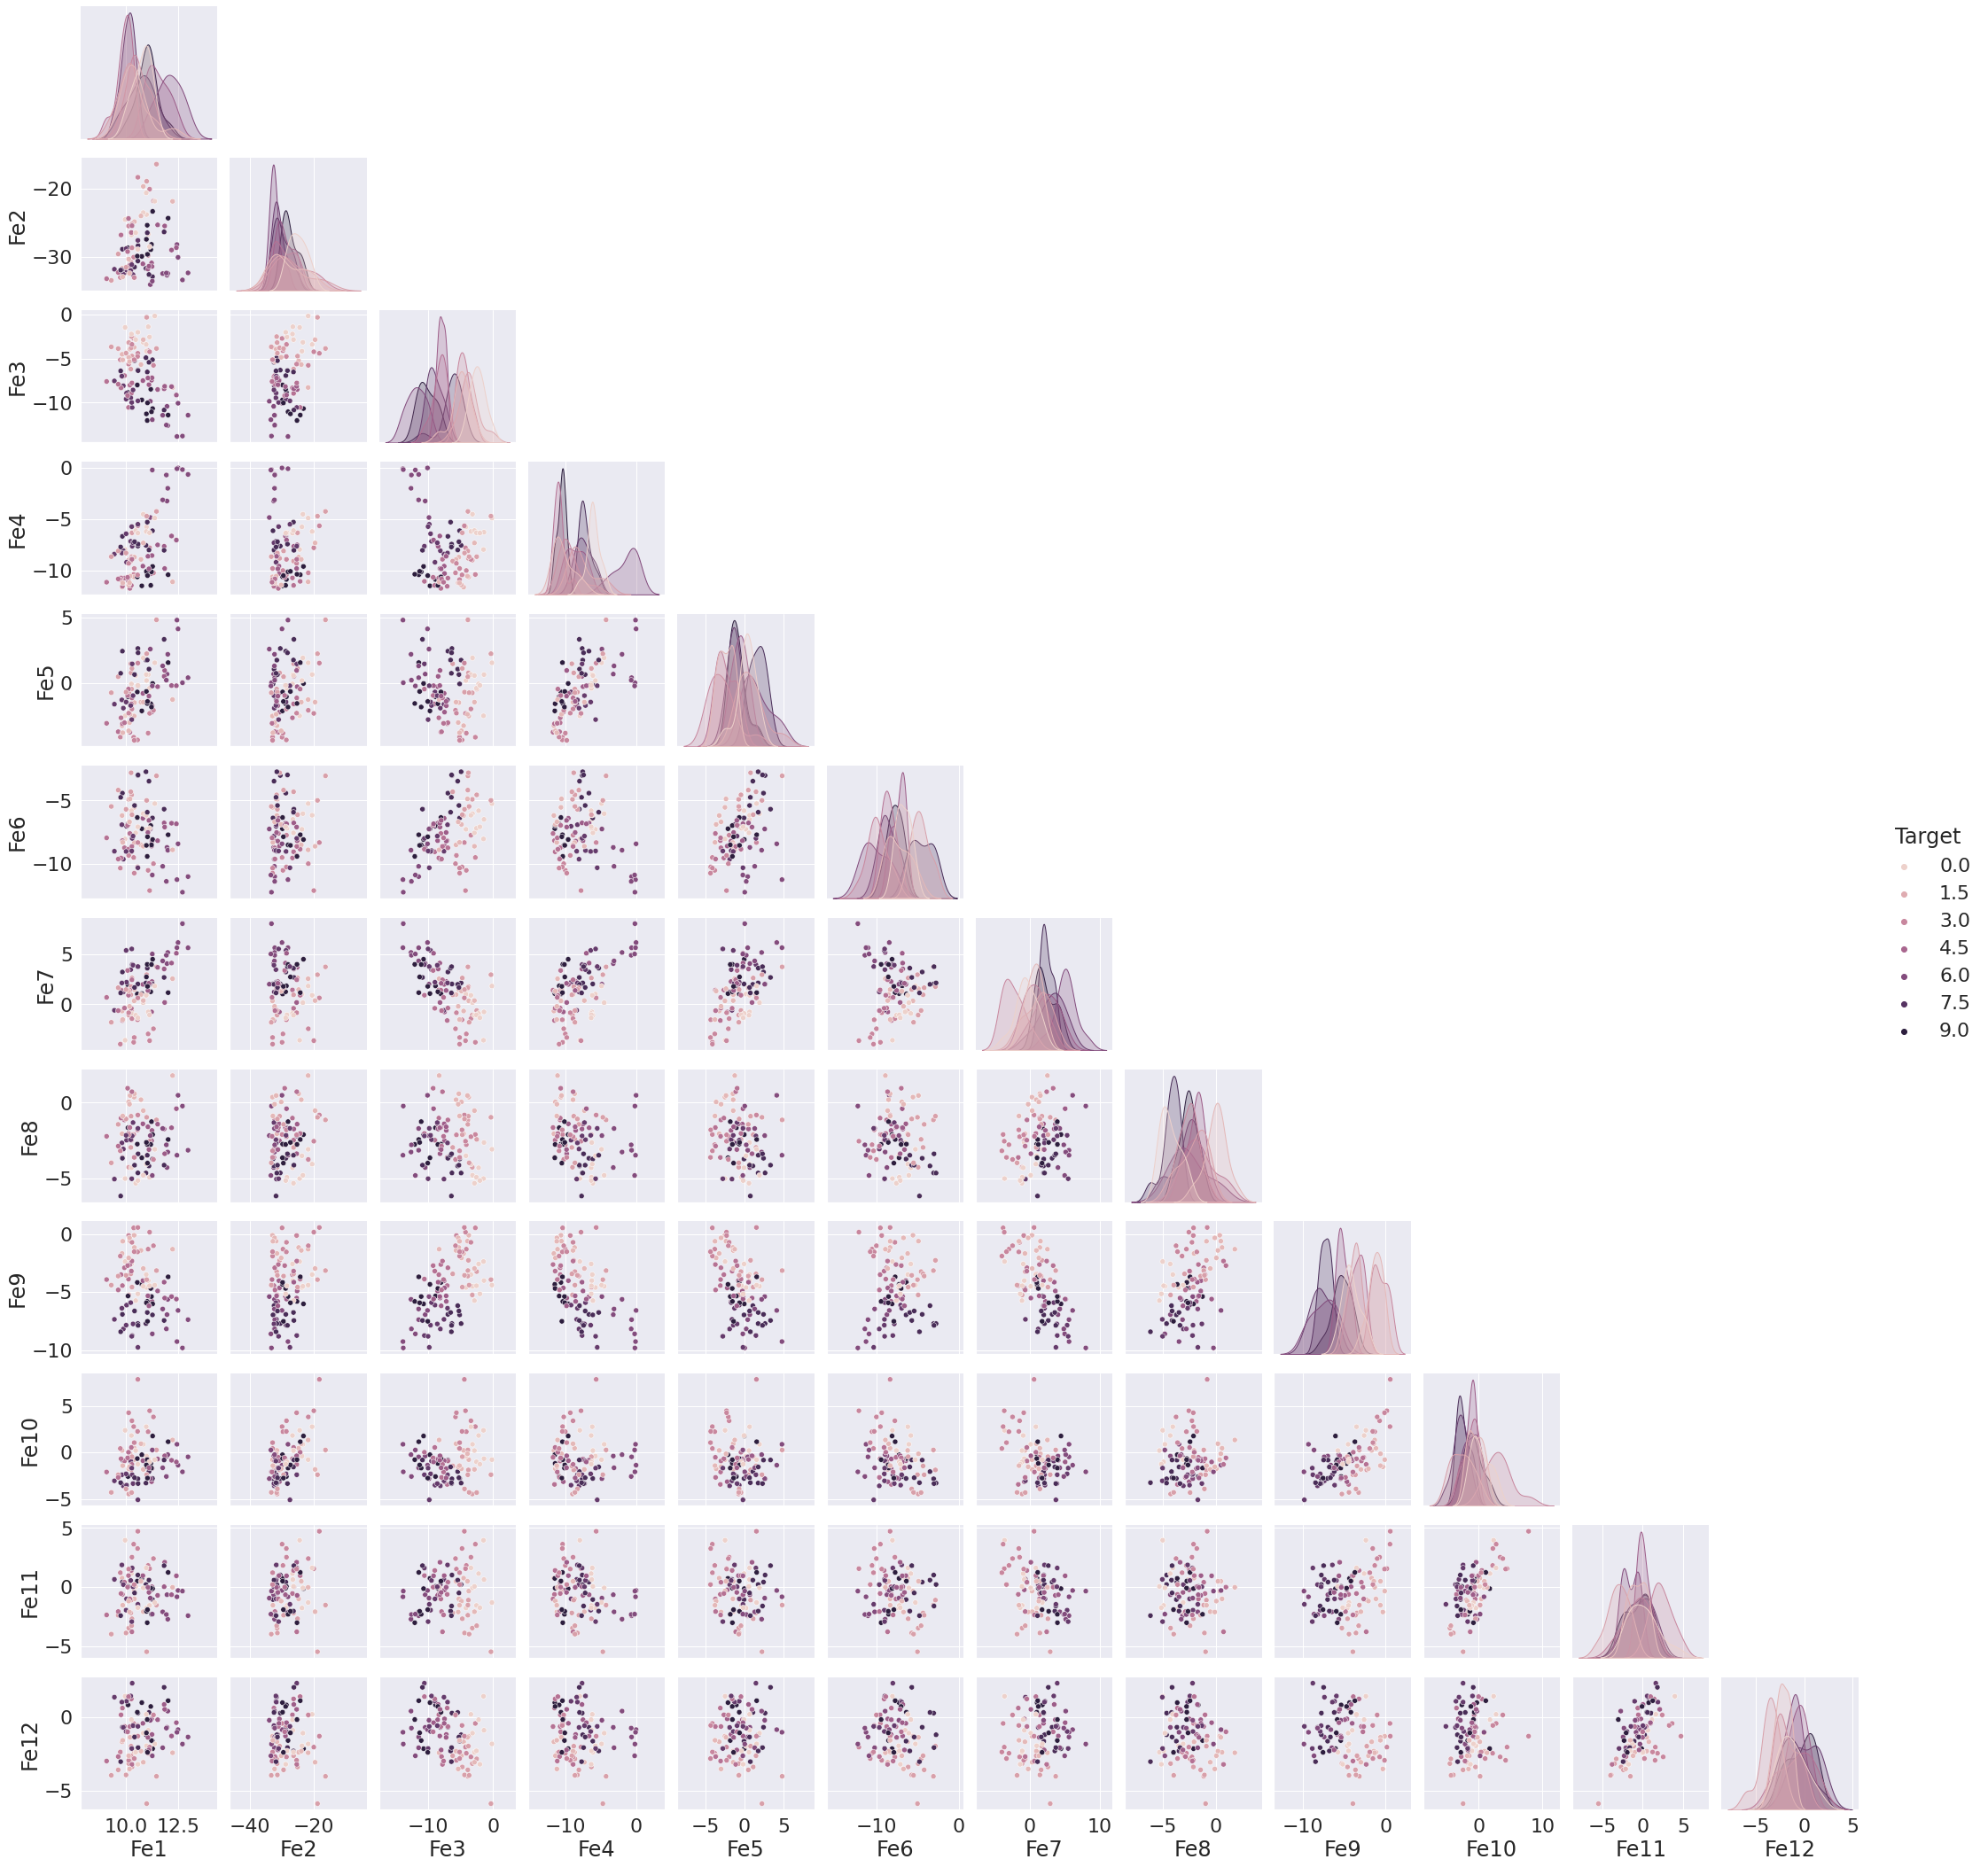

In [6]:
print(mydata['Target'])

sns.pairplot(mydata, hue='Target', corner=True)

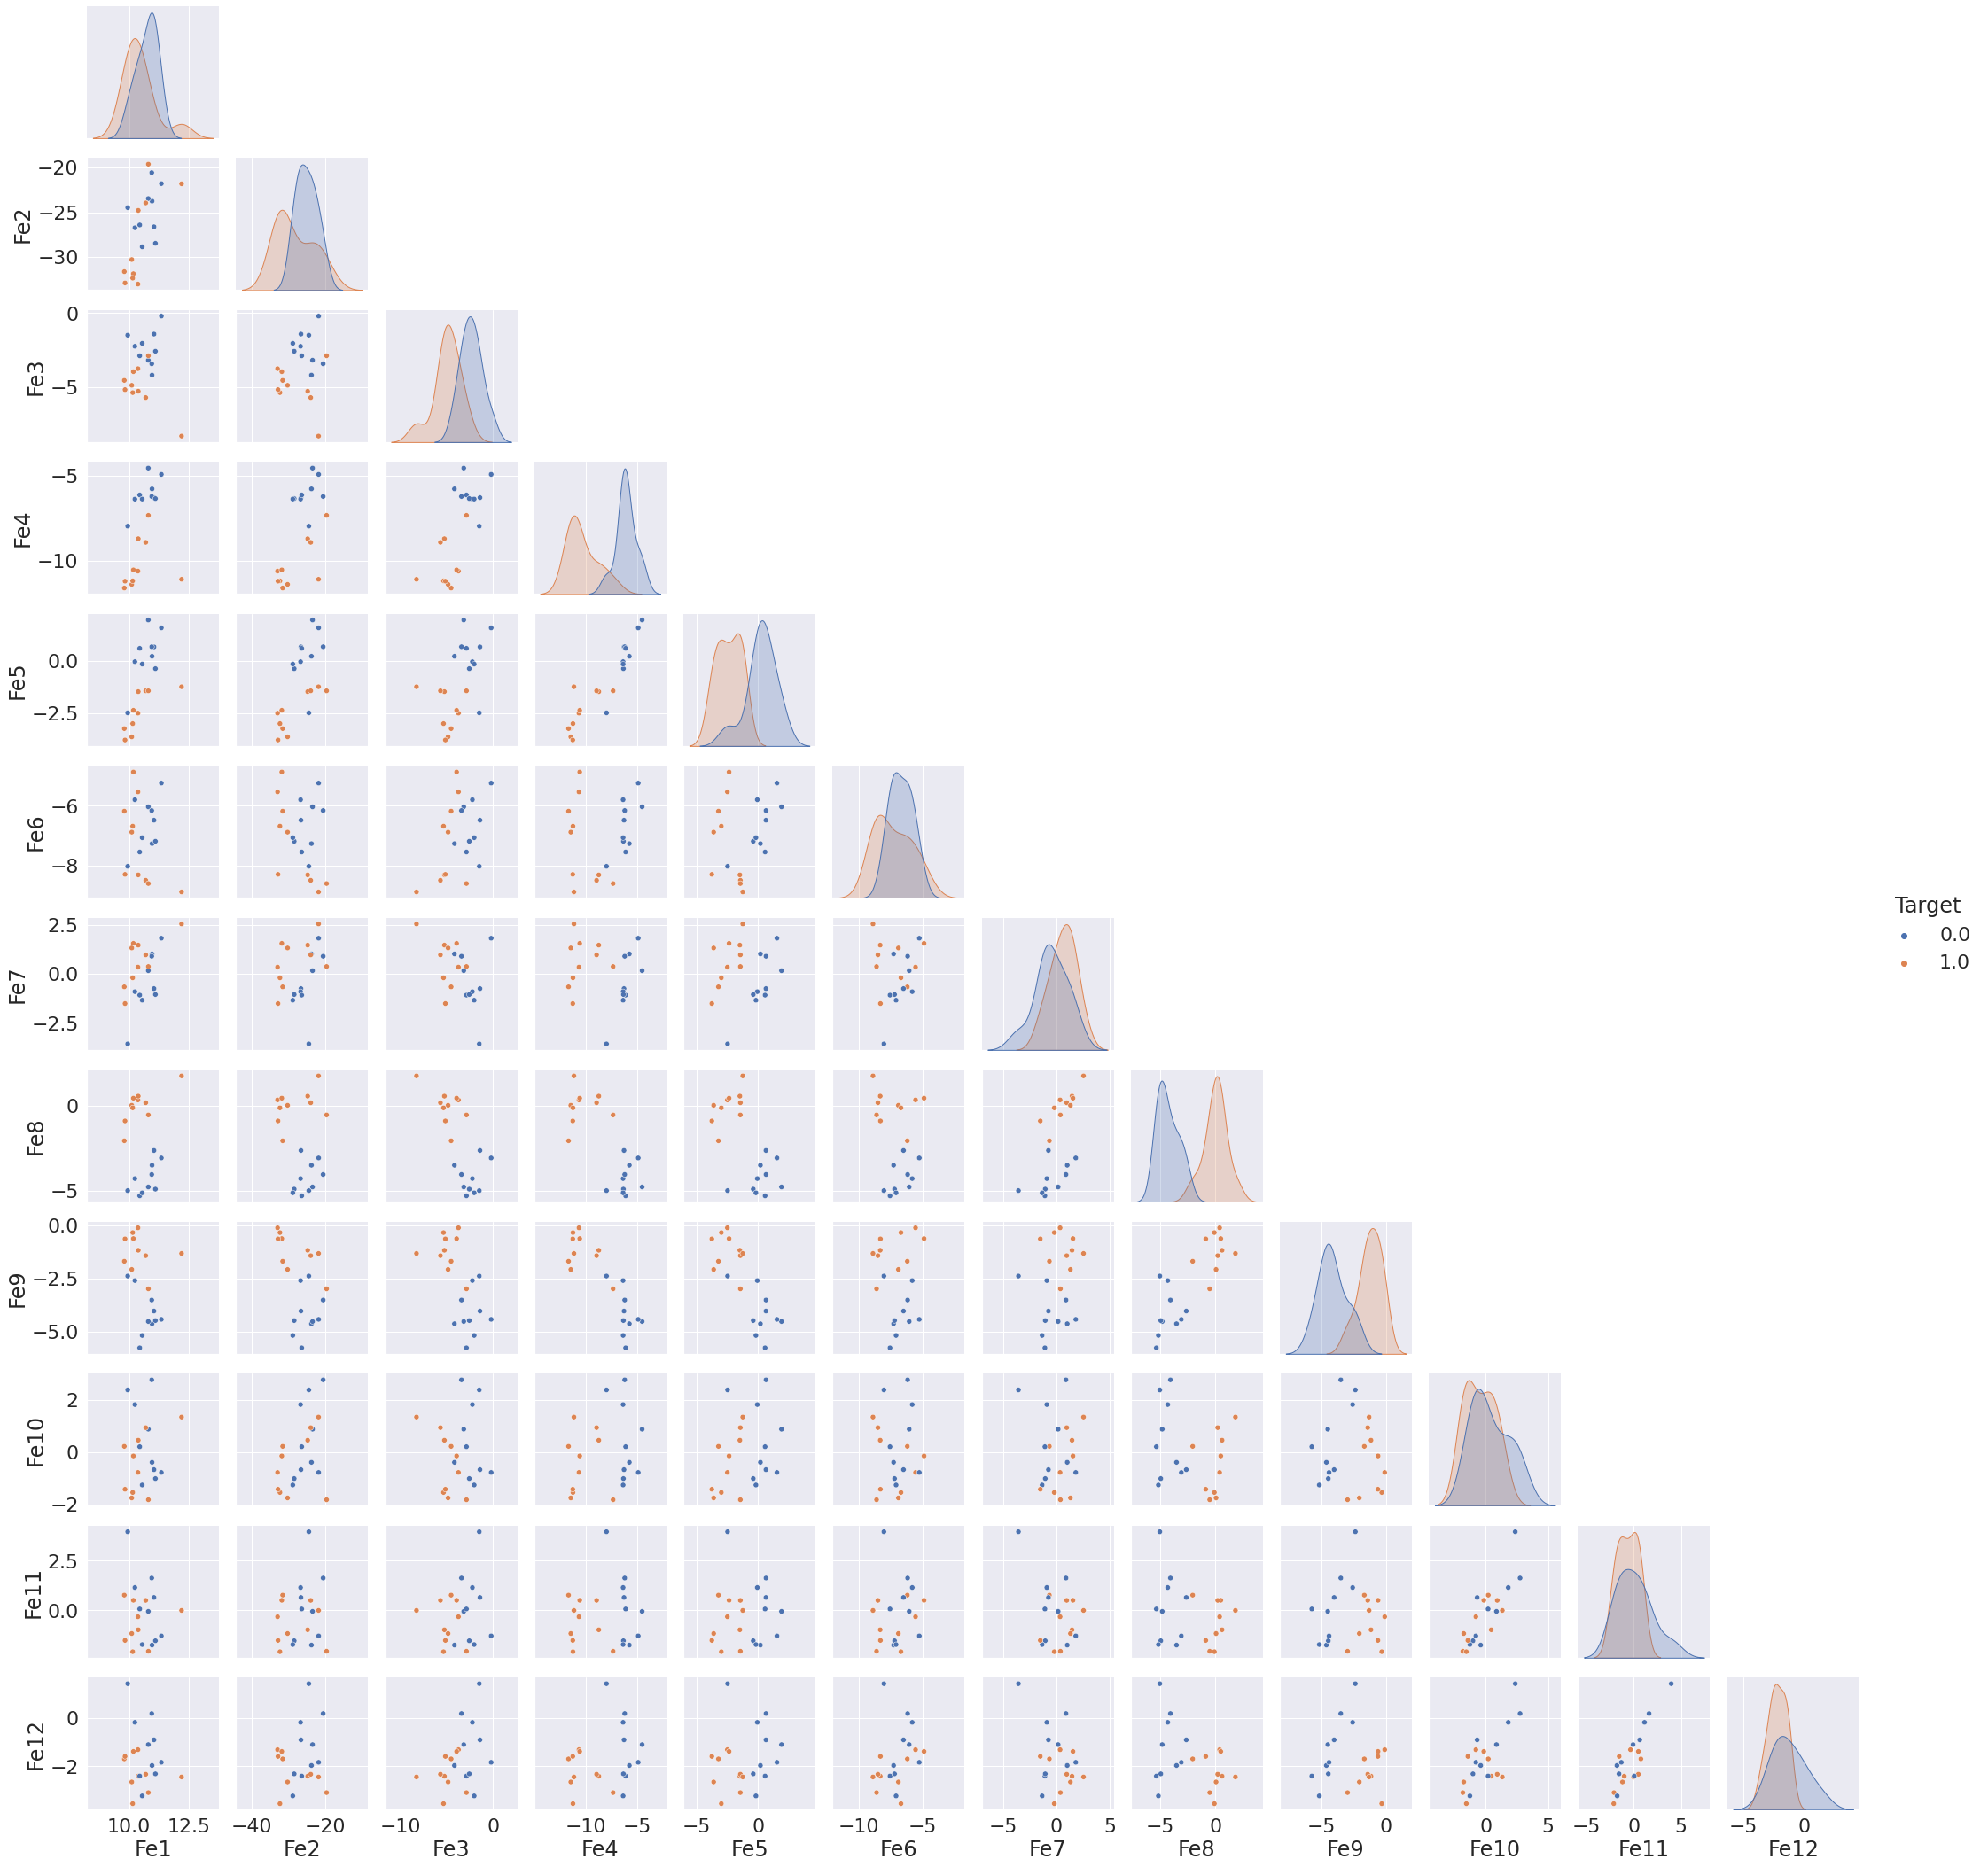

In [7]:
# Selection des 2 features les plus représentatives

data = mydata[mydata['Target'].isin([0, 1])]
sns.pairplot(data, hue='Target', corner=True)

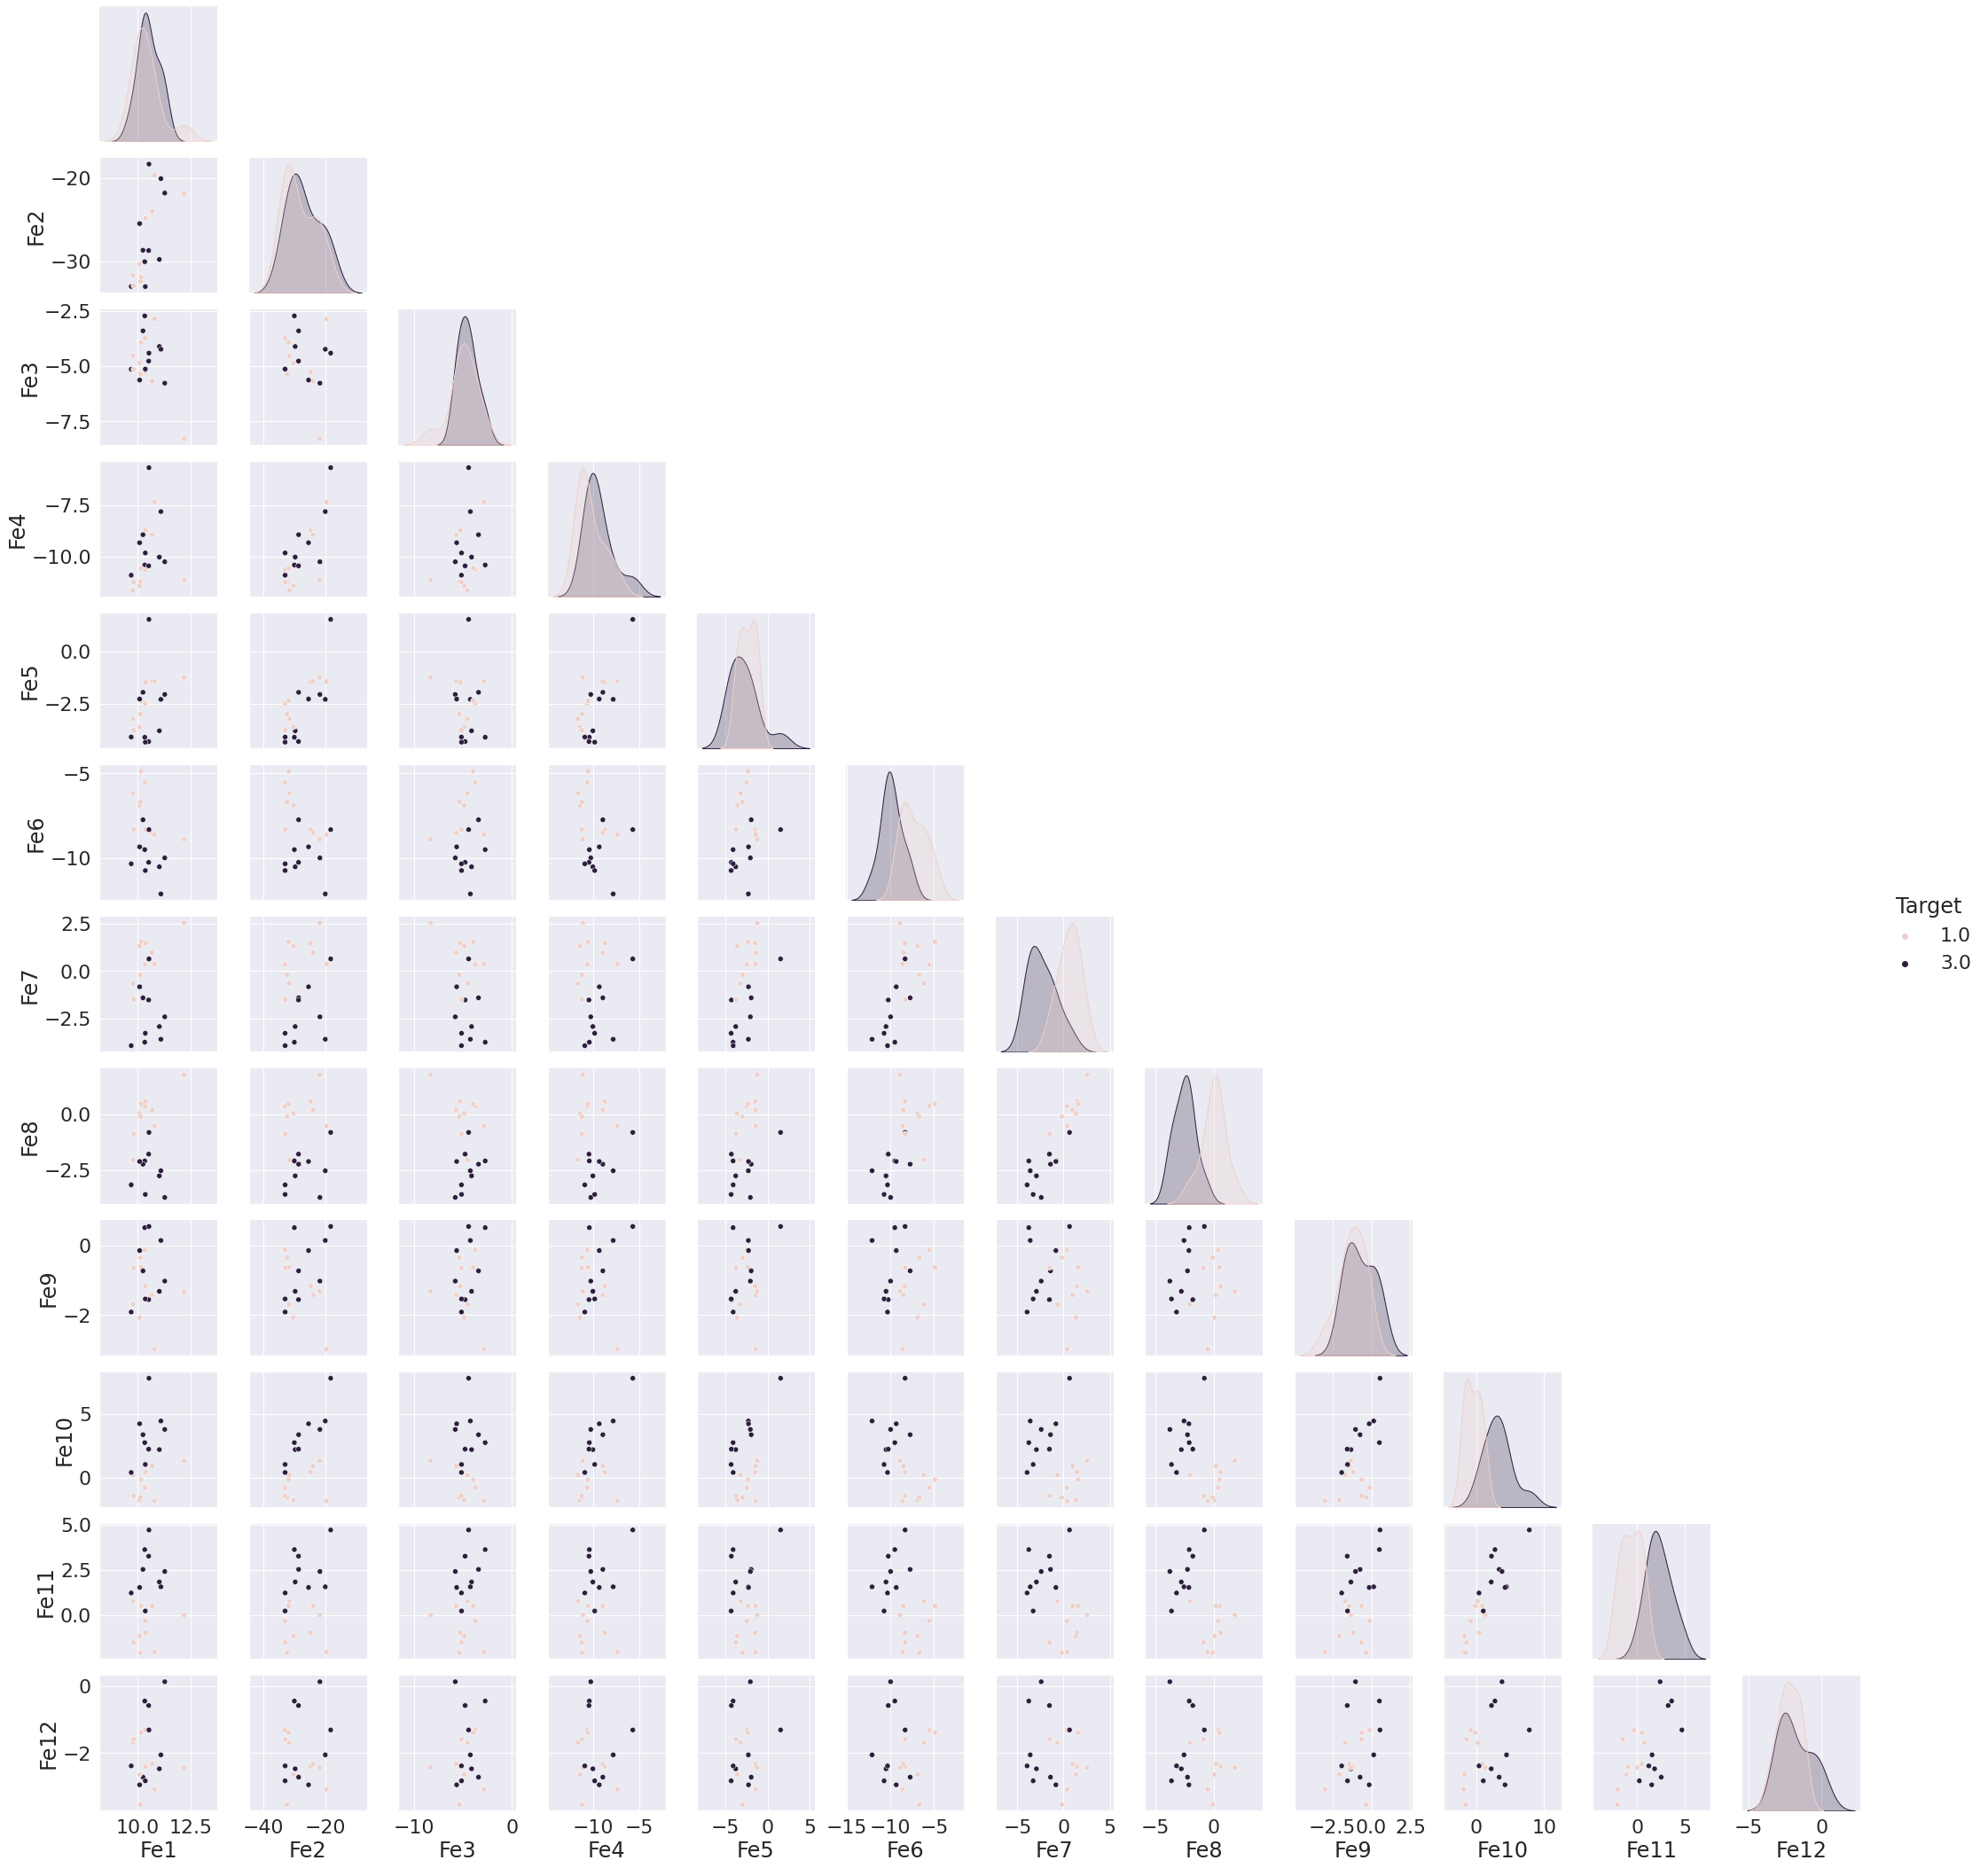

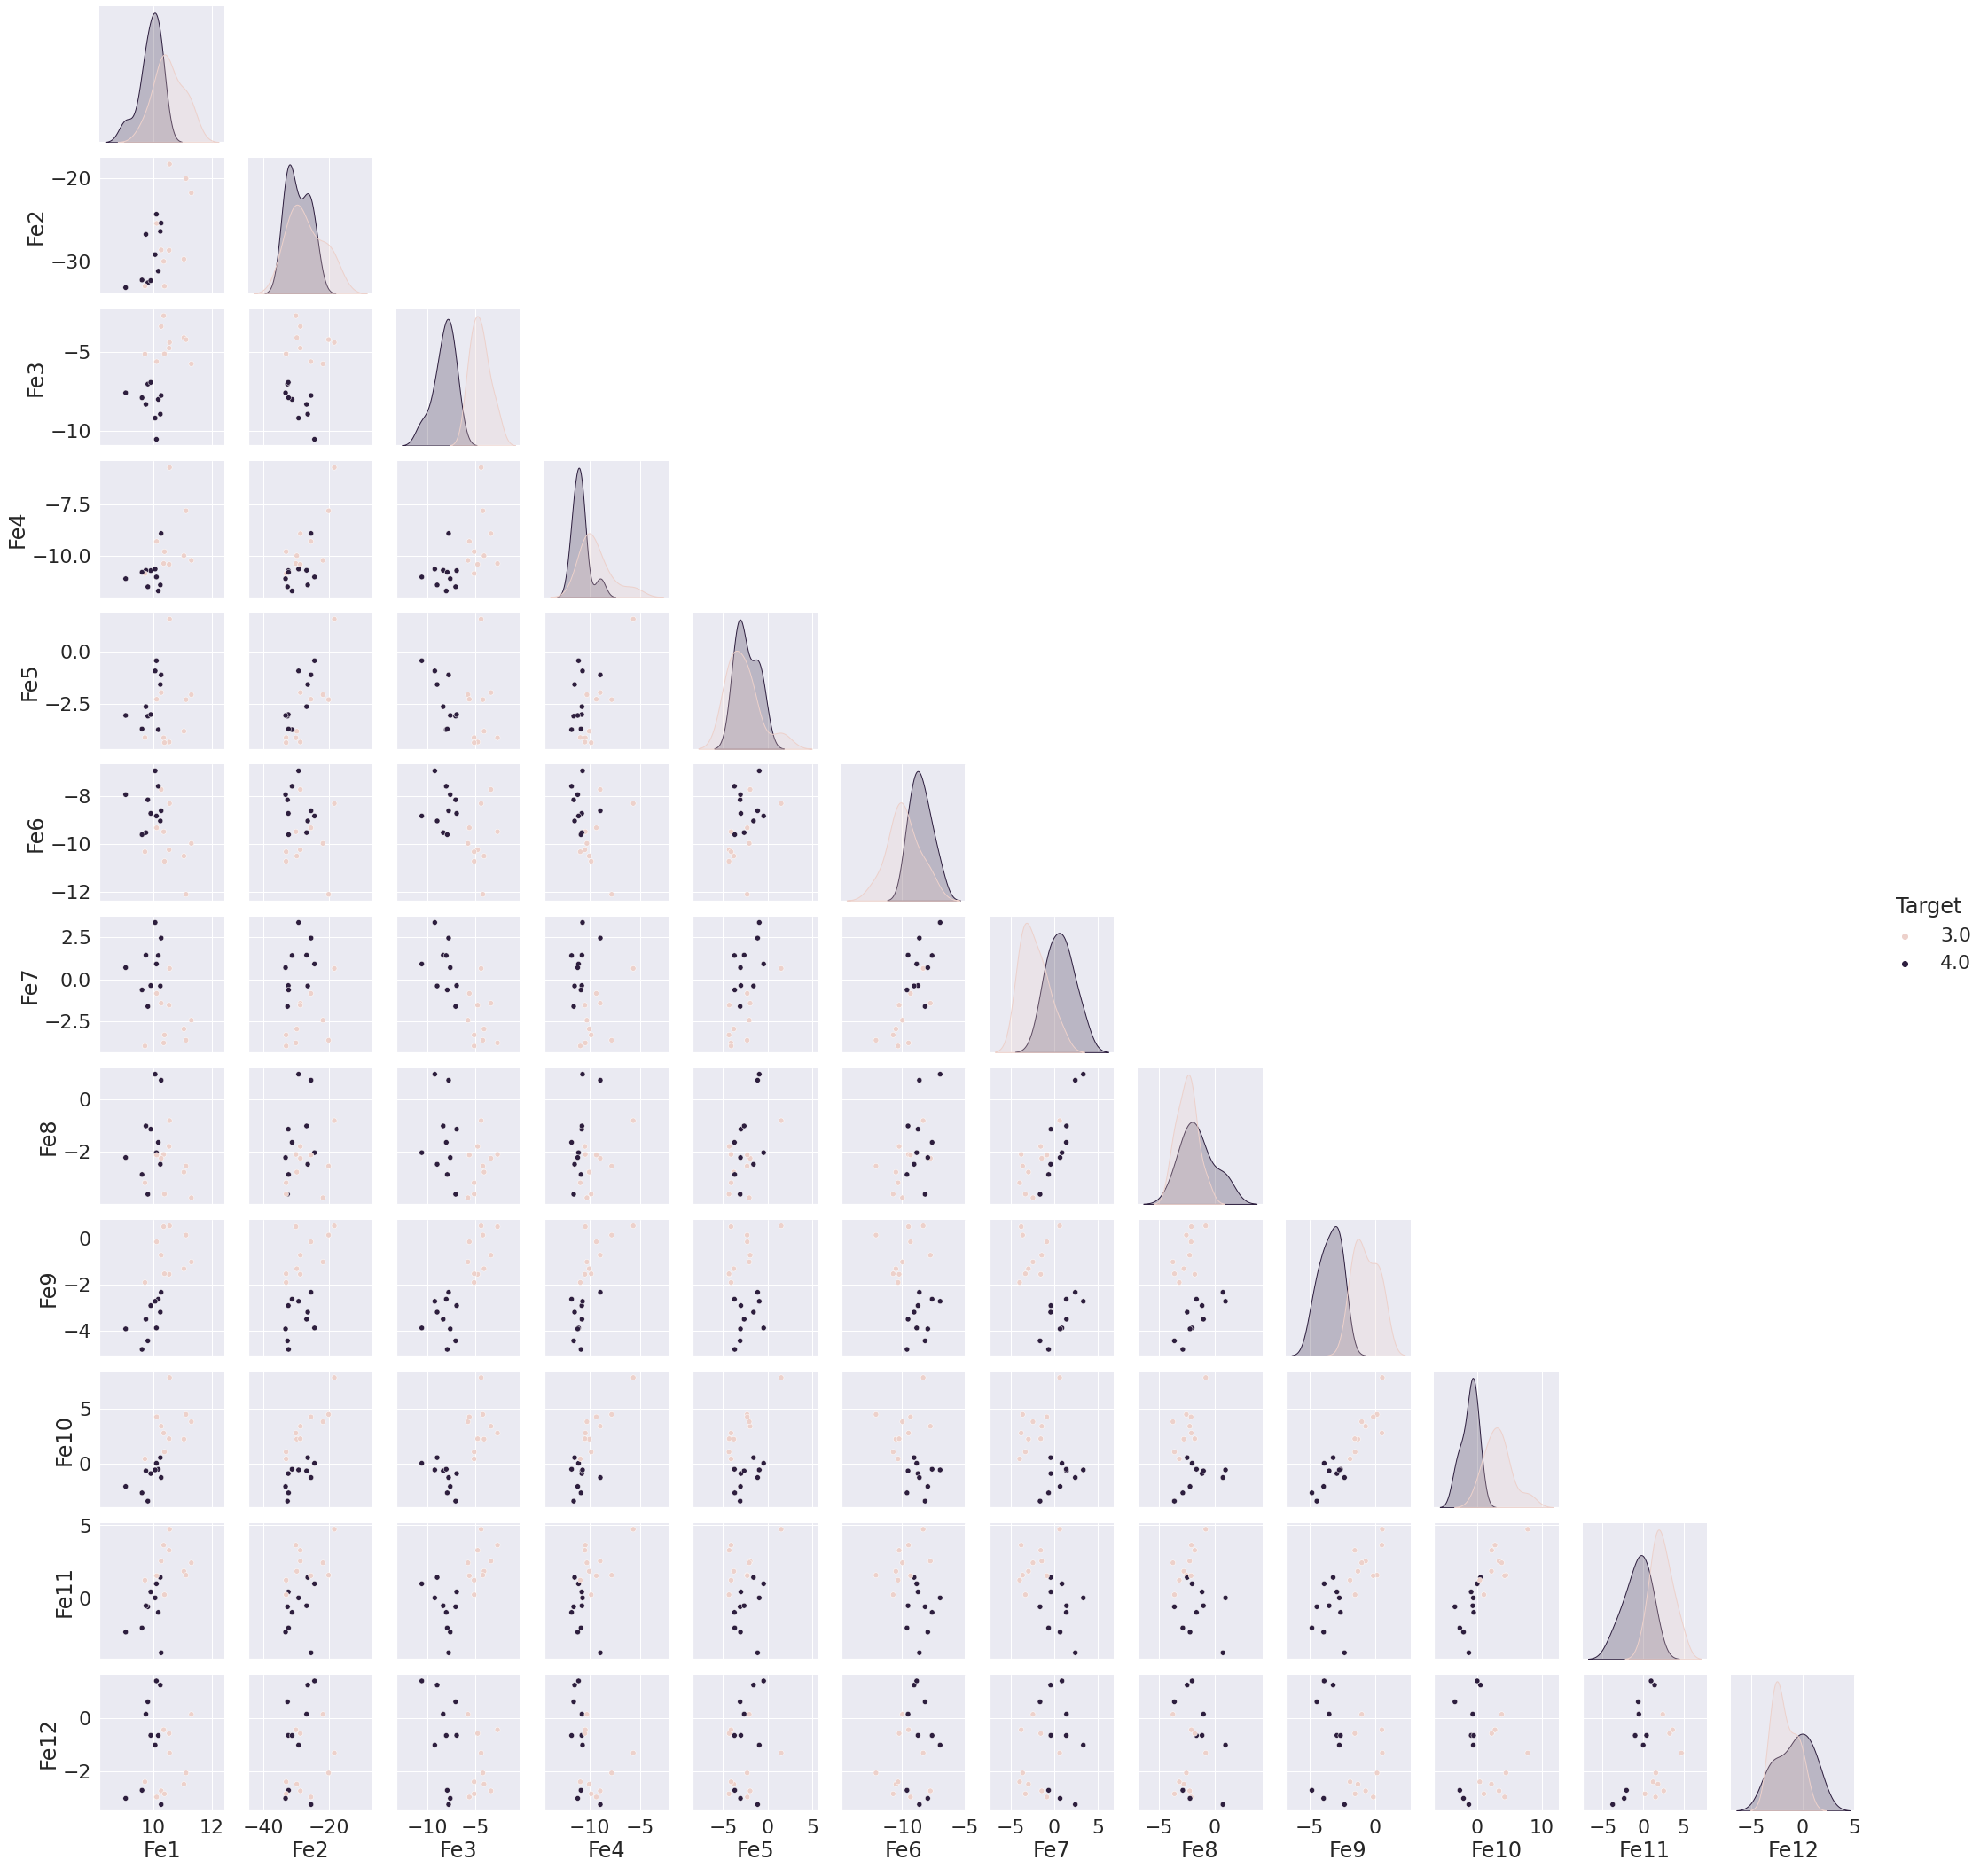

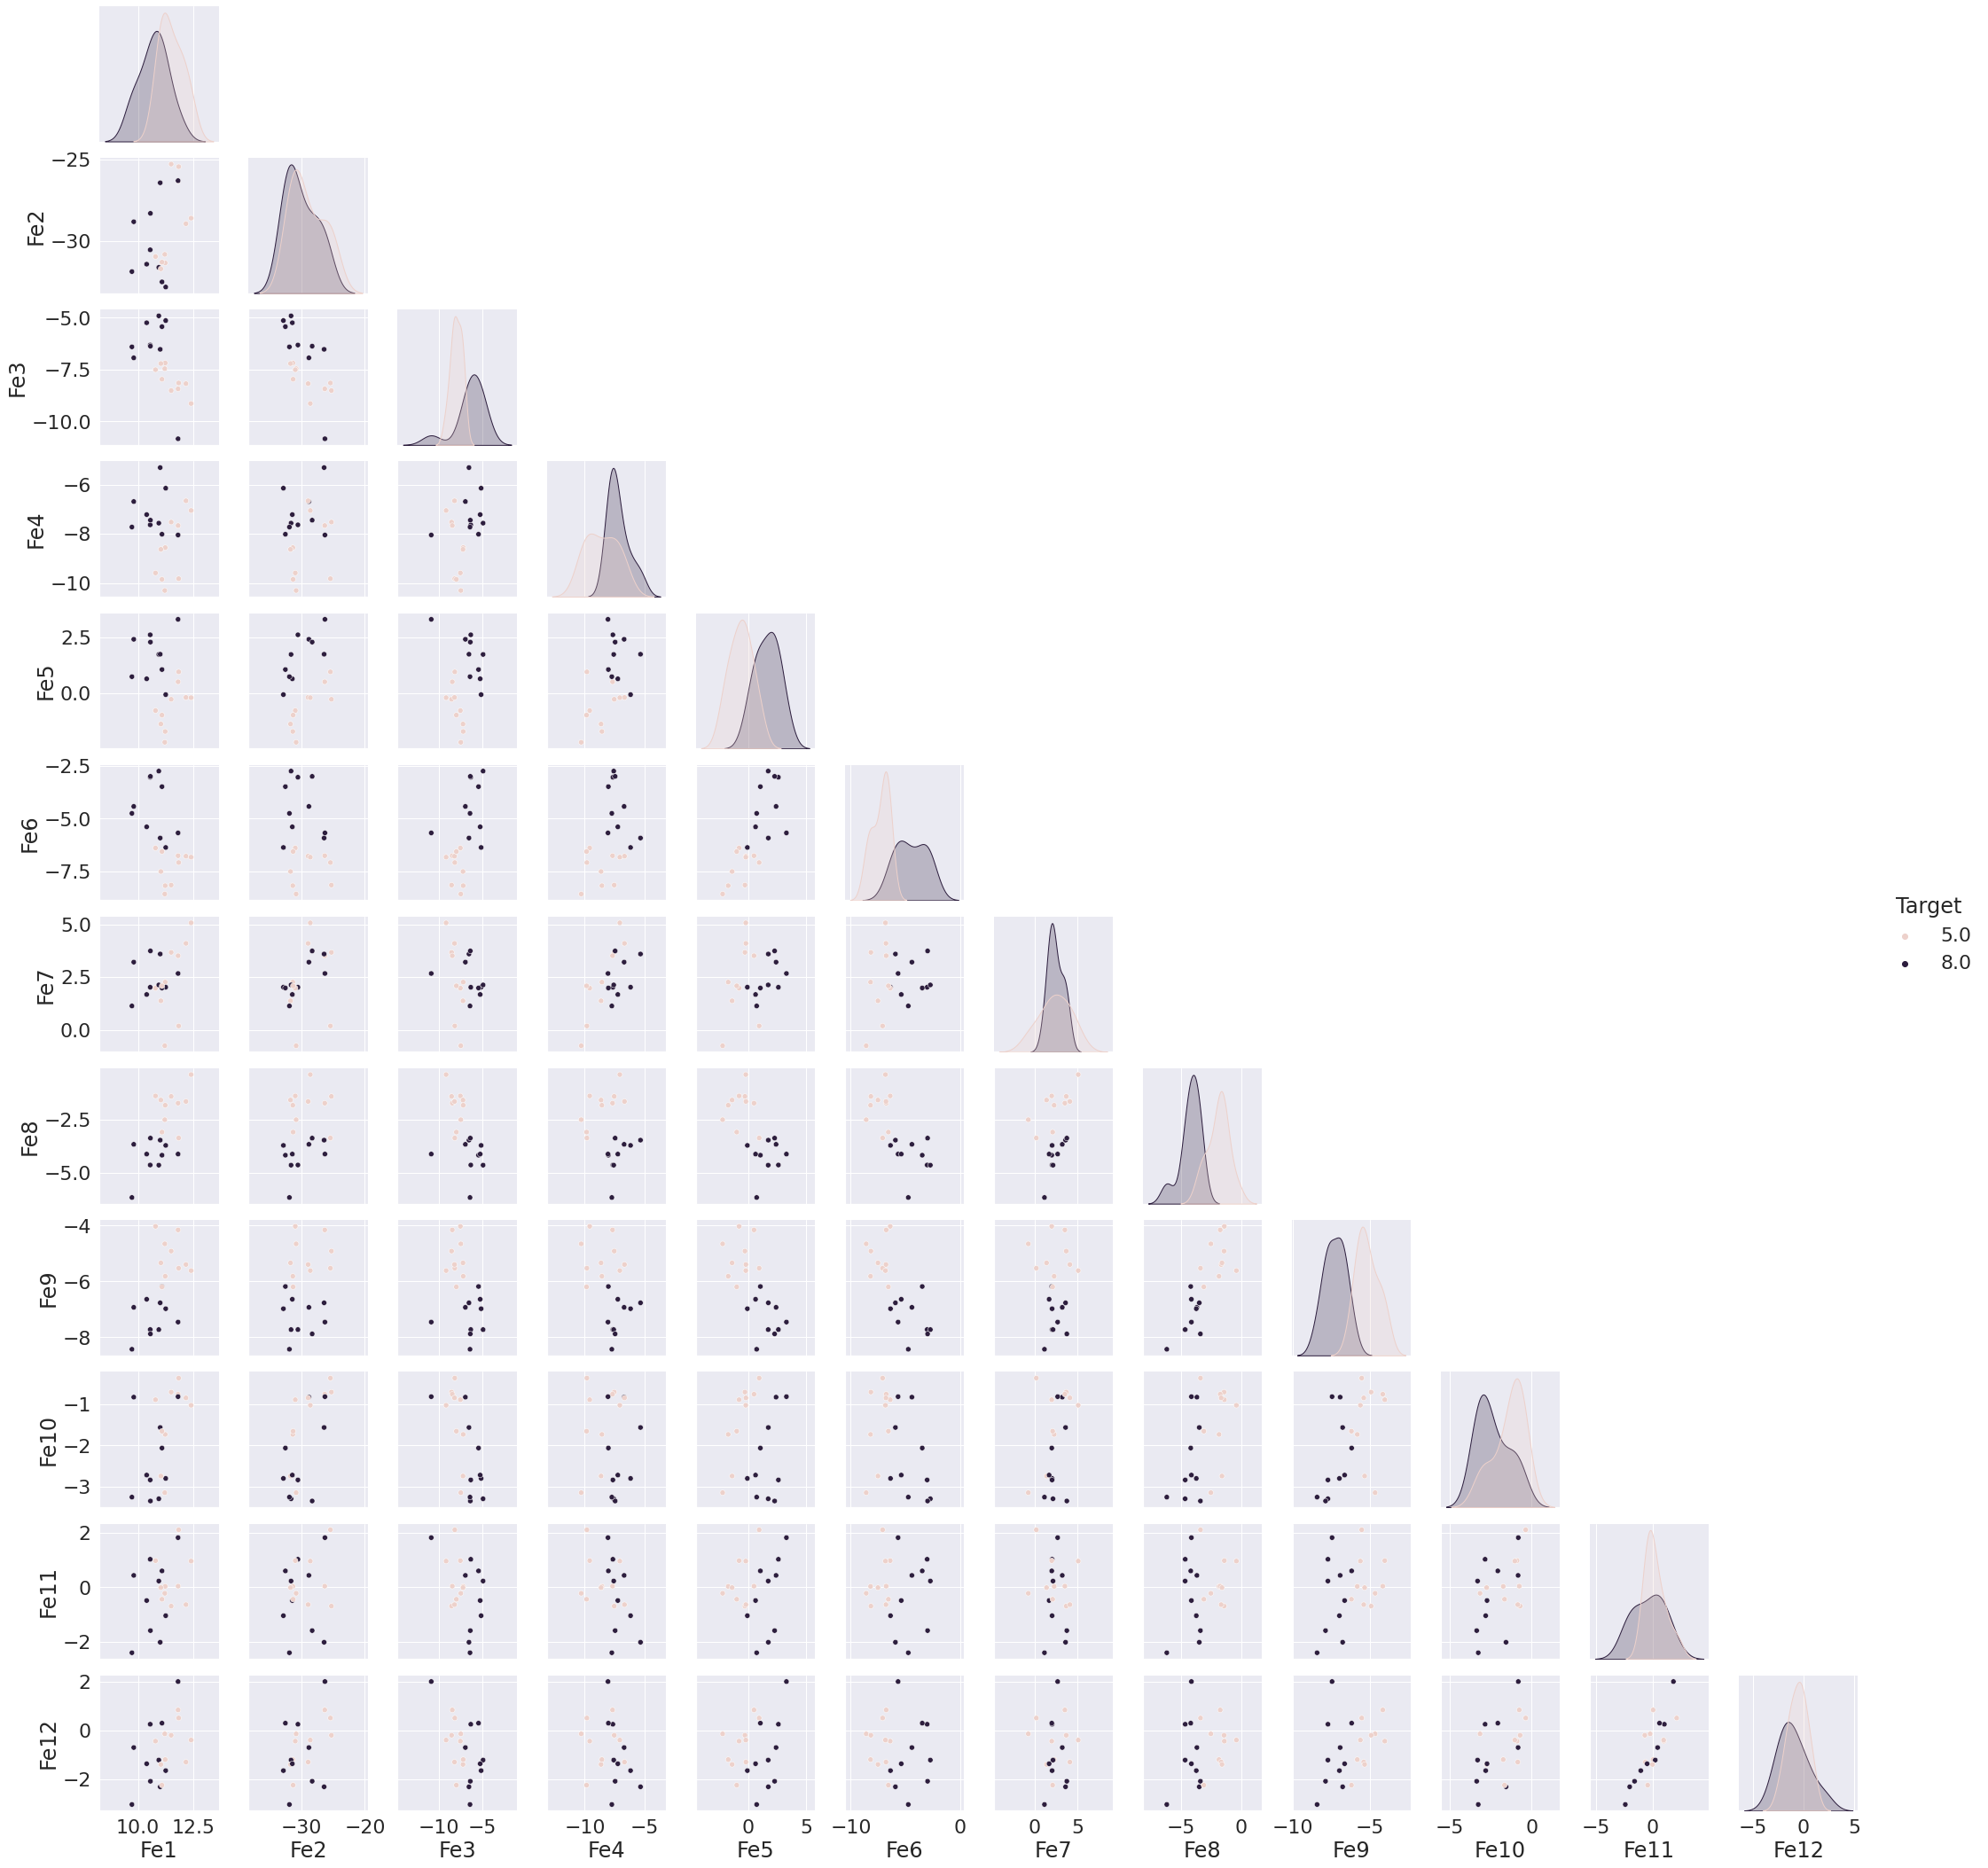

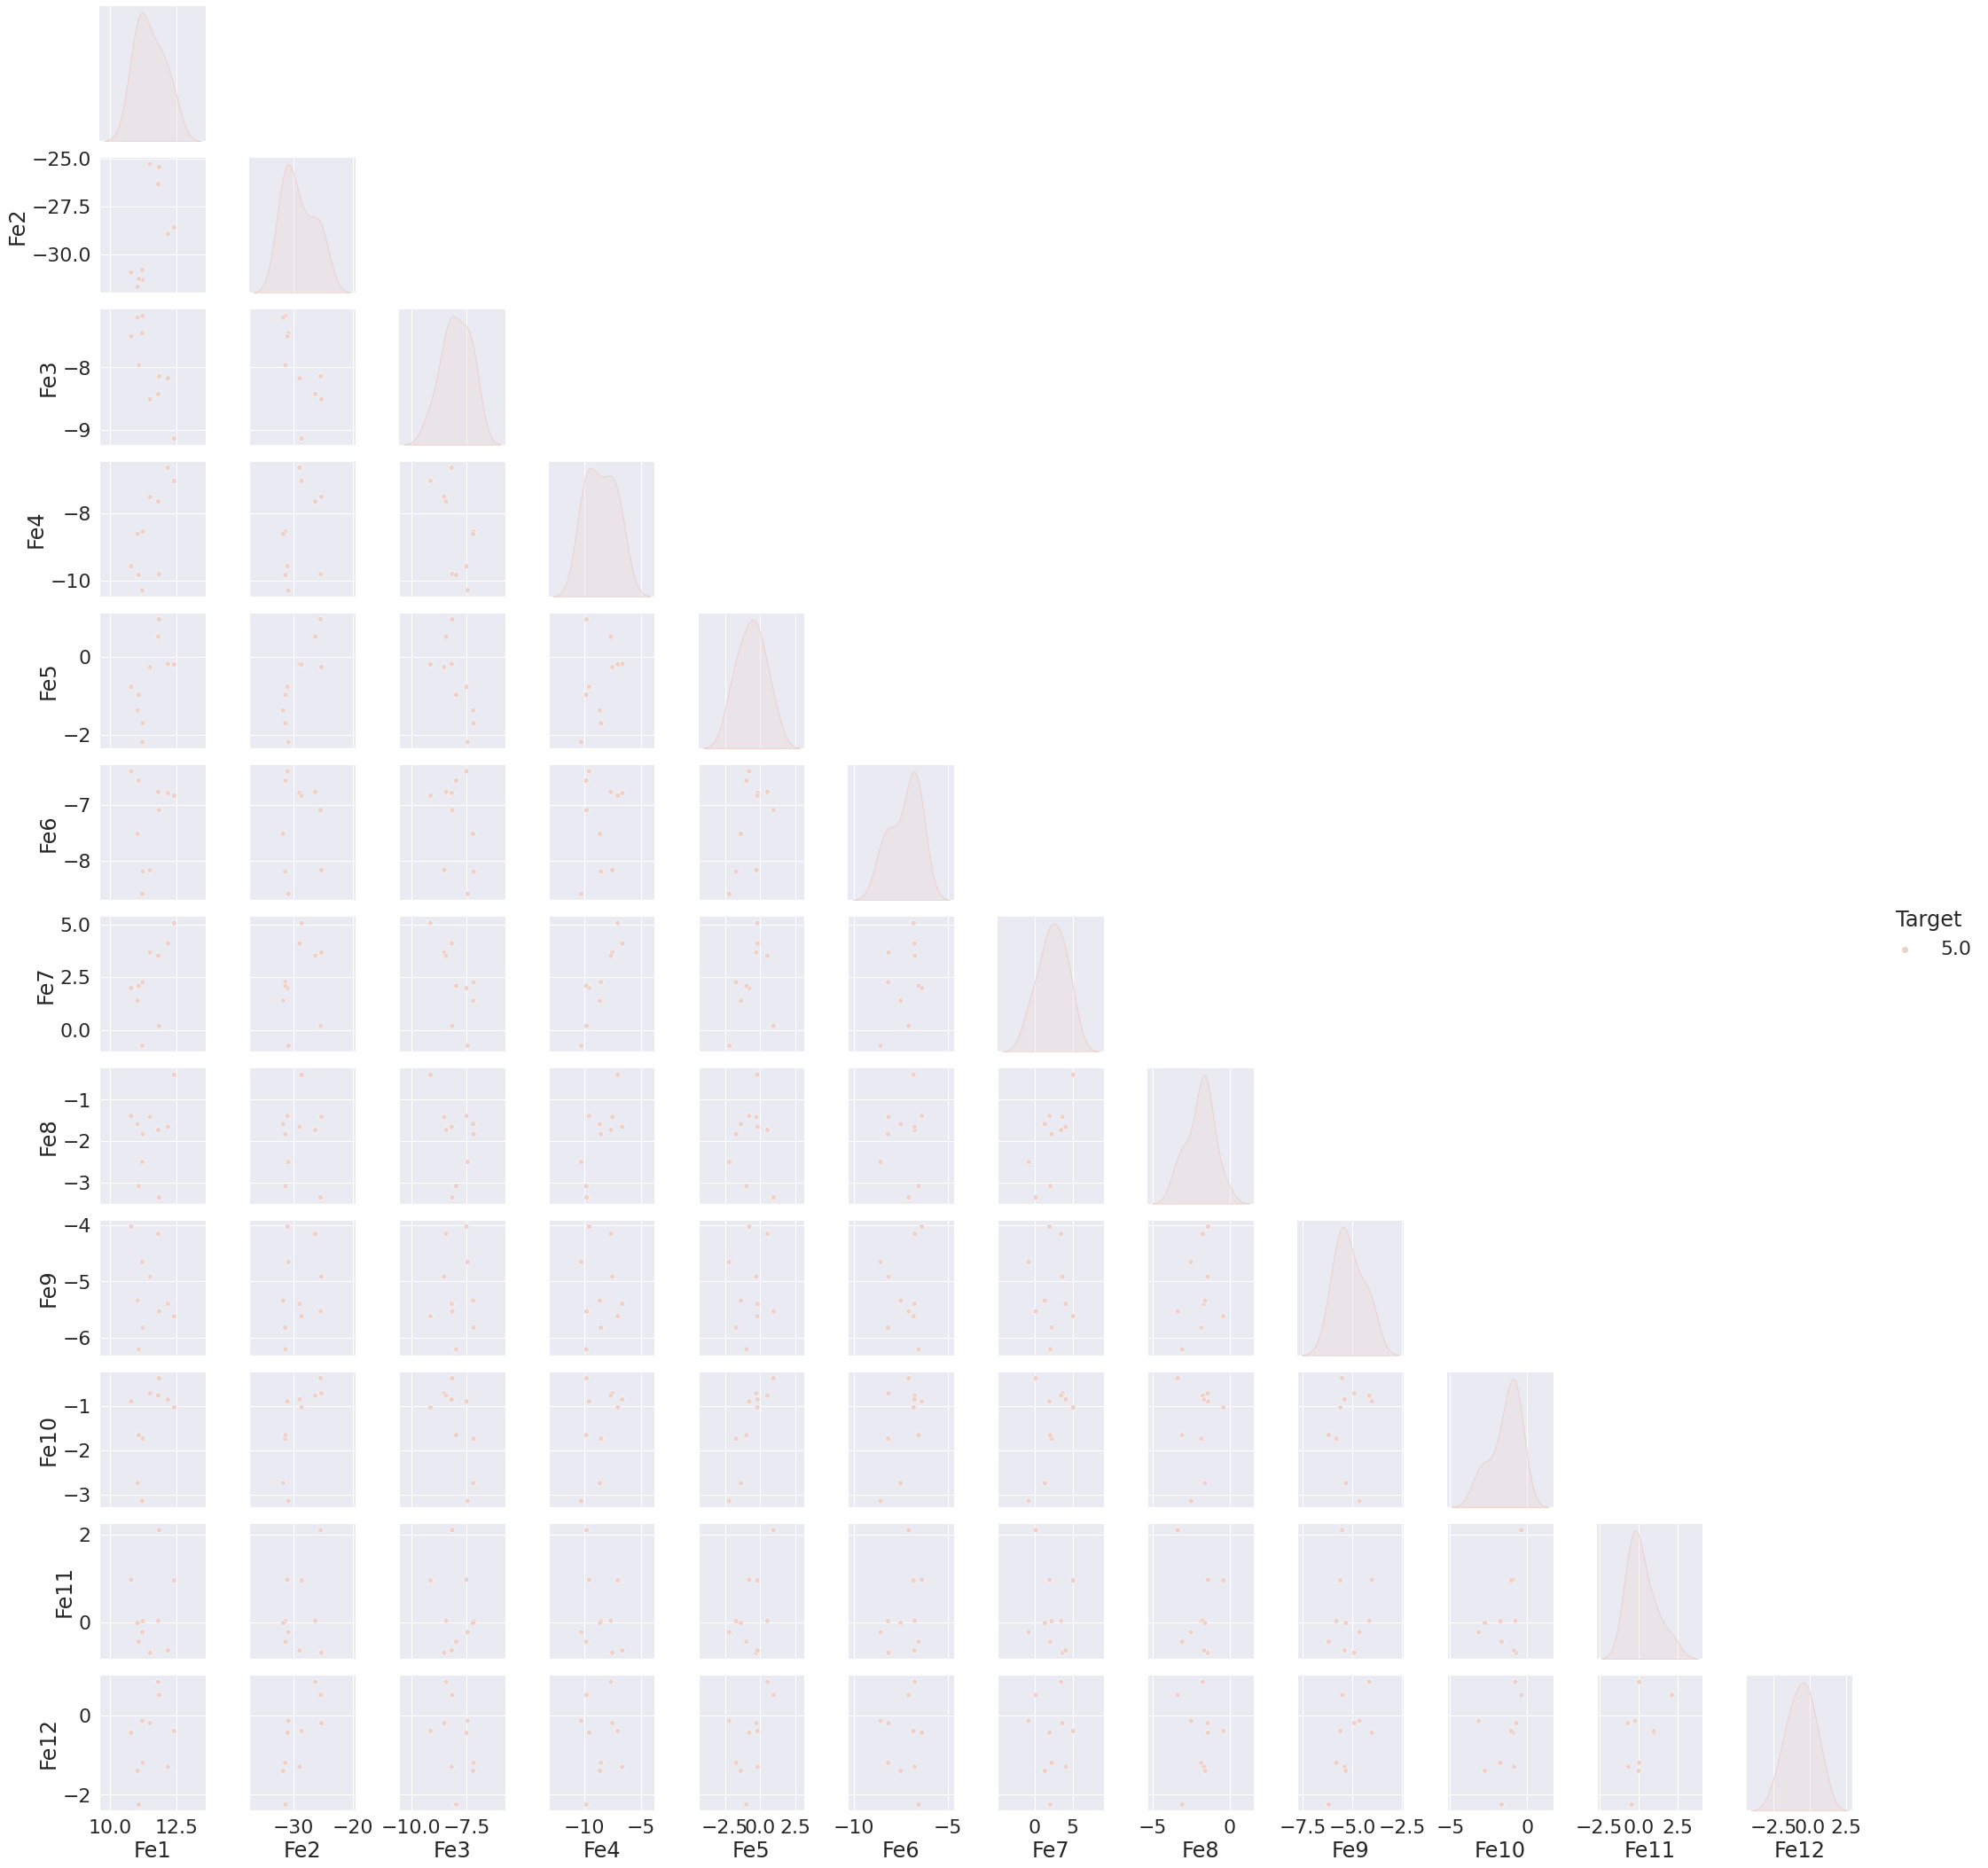

In [8]:
# Selection des paires de features les plus représentatives

for fa, fb in [(1, 3), (3, 4), (5, 8), (11, 5)]:
    data = mydata[mydata['Target'].isin([fa, fb])]
    sns.pairplot(data, hue='Target', corner=True)

L'idée étant de trouver quelles *features* sont les plus représentatives pour distinguer un chiffre d'un autre, la d
émarche est interressante, mais pour 10 chiffres, on ira vers un réseau de neurones :-) 

<AxesSubplot:>

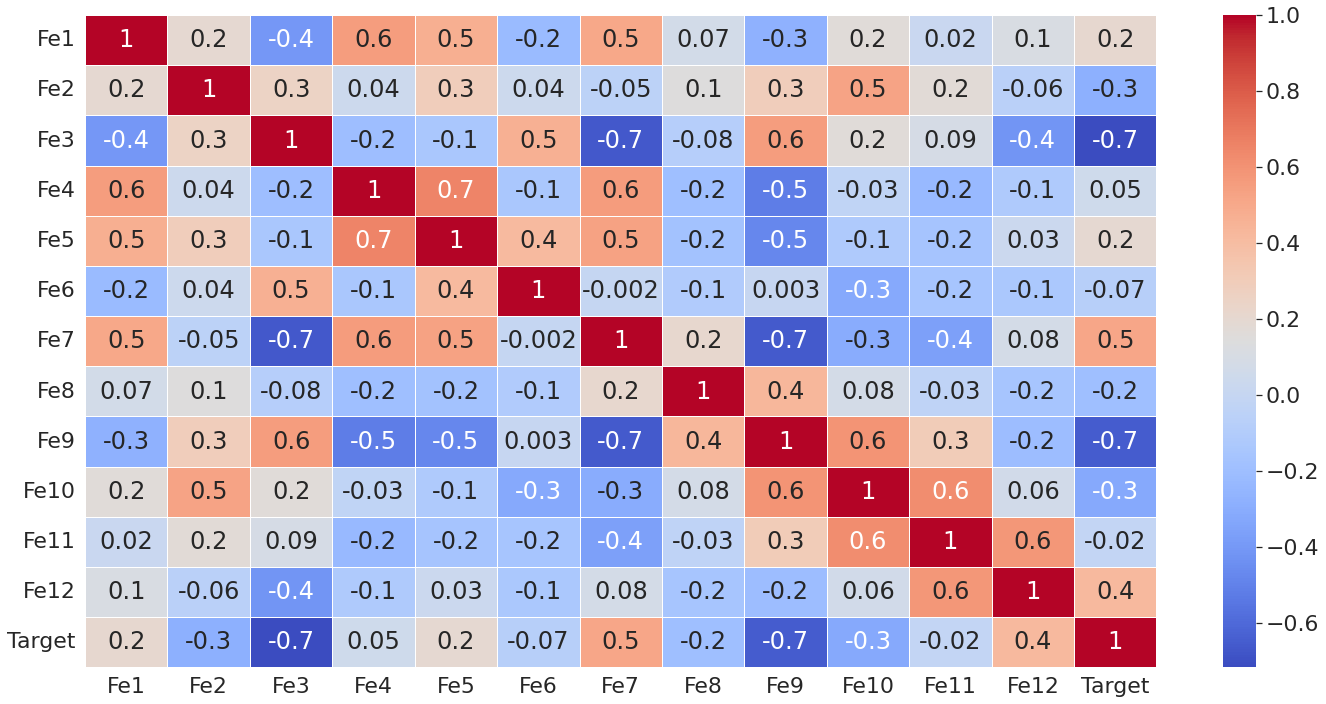

In [9]:
# Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(mydata.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [10]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(100, 12)

In [11]:
y.shape

(100,)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20/100)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 12) (20, 12)
(80,) (20,)


#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X.copy())
x_train_scaled = scaler.transform(x_train)

#And we want to apply this transformation to a new dataset called New_data
x_test_scaled = scaler.transform(x_test)

In [14]:
print(x_train_scaled.mean(), x_train_scaled.std())
print(x_test_scaled.mean(), x_test_scaled.std())

0.027085517995613328 1.0158248304704622
-0.10834207198245209 0.9261355999511158


#### 7. Développer votre meilleur modèle de classification

- [X] from sklearn.tree import DecisionTreeClassifier
- [X] from sklearn.ensemble import RandomForestClassifier
- [X] from sklearn.ensemble import GradientBoostingClassifier
- [~] from sklearn.svm import SVC
- [X] from sklearn.neural_network import MLPClassifier 

##### DecisionTree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


dt = DecisionTreeClassifier()

p = Pipeline([
      ('dt', dt),
    ])
params = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [1, 2, 3, 4, 5, 6, 7],
    'dt__min_samples_split': [2, 3, 5, 10, 15, 20]
    }

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

{'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_split': 5} 0.6623931623931624
0.6


In [16]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_split=5))])

##### RandomForest

In [21]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#best_n = range(1, 100, 10)
best_n = range(75, 85, 1)
# 91} 0.6411069980609906
# 81} 0.6632293319231447
# 77} 0.6794465009695047
# 84} 0.6958399435924555
print(best_n)

params = {'n_estimators': best_n}
gs = GridSearchCV(rf, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

range(75, 85)
{'n_estimators': 82} 0.8632478632478632
0.95


In [22]:
from sklearn.pipeline import Pipeline

p = Pipeline([
      ('rf', rf),
    ])
params = {
    'rf__n_estimators': best_n,
    'rf__criterion': ['gini', 'entropy'],
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

{'rf__criterion': 'gini', 'rf__n_estimators': 77} 0.8499525166191834
1.0


In [23]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

Pipeline(steps=[('rf', RandomForestClassifier(n_estimators=77))])

##### GradientBoosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

best_n = range(1, 150, 10)
#best_n = range(50, 70, 1)
# 61} 0.5866384628944121
# 57} 0.5867265996827076
# 64} 0.5974792878547506
print(best_n)

# à éviter sans une bonne machine :-()
params = {
    'loss':['deviance'],
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'min_samples_split': np.linspace(0.1, 0.5, 12),
    'min_samples_leaf': np.linspace(0.1, 0.5, 12),
    'max_depth':[3,5,8],
    'max_features':['log2', 'sqrt'],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    'n_estimators': best_n
    }

params = {'n_estimators': best_n}

gs = GridSearchCV(gb, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))



range(1, 150, 10)
{'n_estimators': 81} 0.563627730294397
0.7


In [26]:
from sklearn.pipeline import Pipeline

p = Pipeline([
      ('gb', gb),
    ])
params = {
    'gb__n_estimators': best_n,
    'gb__criterion': ['friedman_mse', 'squared_error'],
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

{'gb__criterion': 'friedman_mse', 'gb__n_estimators': 71} 0.563627730294397
0.65


In [27]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

Pipeline(steps=[('gb', GradientBoostingClassifier(n_estimators=71))])

##### SVM

In [24]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
#best_C = np.logspace(1,9,num=9,base=10,dtype='int')  # range() avec pas logarithmique (de 2^1 à 2^10)
#best_C = range(1, 100, 10)
#best_C = range(1, 10)
best_C = [i/100000 for i in range(18830, 18840)]
# 138 : 0.6518018018018019
# 100 : 0.6518018018018019
#   1 : 0.6783783783783783
#   2 : 0.6840840840840843
# .19 : 0.6837837837837838
#.1883
print(best_C)
grid = GridSearchCV(LinearSVC(), {'C': best_C, 'dual': [False]})
grid.fit(x_train_scaled, y_train)
print("Best score : ", grid.best_score_)
print("Best param : ", grid.best_params_)

[0.1883, 0.18831, 0.18832, 0.18833, 0.18834, 0.18835, 0.18836, 0.18837, 0.18838, 0.18839]
Best score :  0.875
Best param :  {'C': 0.1883, 'dual': False}


In [27]:
from sklearn.pipeline import Pipeline

svm = SVC()
print(svm.get_params().keys())

p = Pipeline([
      ('svm', svm),
    ])
params = {
    'svm__C': best_C,
    # 'svm__dual': [False],
    
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
{'svm__C': 0.1883} 0.2606837606837607
0.0


In [28]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

LinearSVC(C=0.1883, dual=False)

##### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

mlp = MLPClassifier()

print(mlp.get_params().keys())

p = Pipeline([
      ('mlp', mlp),
    ])
params = {
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__max_iter': range(1, 1000, 100),
    'mlp__alpha': 10.0 ** -np.arange(1, 10),
    'mlp__hidden_layer_sizes':np.arange(10, 15),
    'mlp__random_state':[0],
    #'mlp__n_jobs': [-1]
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


/home/romain/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/romain/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/romain/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

In [ ]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

##### Tensorflow

In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrainement du modèle
history = model.fit(x_train_scaled,
                    y_train,
                    epochs=20,
                    batch_size=128)

2022-03-22 22:55:56.052886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-22 22:55:56.052966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/20


2022-03-22 22:55:57.685864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 22:55:57.686975: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-22 22:55:57.687097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-22 22:55:57.687207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-22 22:55:57.687318: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

1/1 [==============================] - 0s 252ms/step - loss: 2.3079 - accuracy: 0.1000
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 2.2152 - accuracy: 0.3250
Epoch 3/20
1/1 [==============================] - 0s 2ms/step - loss: 2.1309 - accuracy: 0.4625
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 2.0550 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 1.9831 - accuracy: 0.5500
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 1.9134 - accuracy: 0.5625
Epoch 7/20
1/1 [==============================] - 0s 3ms/step - loss: 1.8437 - accuracy: 0.6250
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 1.7735 - accuracy: 0.6250
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 1.7020 - accuracy: 0.6375
Epoch 10/20
1/1 [==============================] - 0s 2ms/step - loss: 1.6298 - accuracy: 0.6500
Epoch 11/20
1/1 [==============================]

In [38]:
# évaluation du modèle
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print('test_acc: ',test_acc)

# Predictions
predictions = model.predict(x_test_scaled)
print("Meilleure predictions pour : ", np.argmax(predictions[0]))

1/1 [==============================] - 0s 75ms/step - loss: 1.3194 - accuracy: 0.7500
test_acc:  0.75
Meilleure predictions pour :  0


In [39]:
# Meilleur Modèle :
model = model
model.fit(x_train_scaled, y_train)

3/3 [==============================] - 0s 3ms/step - loss: 0.8200 - accuracy: 0.8625


##### XGBoost

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Optimiser la structure des données
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

# k-fold Cross Validation
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print(cv_results.head())

print("Meilleur : ", (cv_results["test-rmse-mean"]).tail(1))

/home/romain/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RMSE: 2.997190
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         4.555974        0.073929        4.584157       0.175626
1         4.229087        0.049433        4.280738       0.164214
2         3.951251        0.035256        4.040815       0.186686
3         3.685770        0.056127        3.823553       0.166466
4         3.456306        0.030874        3.613331       0.144680
Meilleur :  49    1.87547
Name: test-rmse-mean, dtype: float64


In [35]:
# Meilleur Modèle :
model = xg_reg
#model = cv_results.best_estimator_
model.fit(x_train_scaled, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# save in JSON format
model.save_model("model_XGBoot.json")

#### Pipeline de selection

In [ ]:
p = Pipeline([
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    #('mlp', mlp),
])

best_n = range(75, 85, 1)

params = {
    'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_split': 5,
    'rf__criterion': 'gini', 'rf__n_estimators': 77,
    'gb__criterion': 'friedman_mse', 'gb__n_estimators': 71,
    'svm__C': 0.1883,
    #'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    #'mlp__max_iter': range(1, 1000, 100),
    #'mlp__alpha': 10.0 ** -np.arange(1, 10),
    #'mlp__hidden_layer_sizes':np.arange(10, 15),
    #'mlp__random_state':[0],
    #'mlp__n_jobs': [-1]

}


gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

In [ ]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

# Application en Temps Réel

Voir le notebook `Recorder` !

In [37]:
# Pour le dev de rec et rec2
from importlib import reload  # Python 3.4+

import Tools.tools
reload(Tools.tools)

<module 'Tools.tools' from 'C:\\Users\\utilisateur\\Documents\\Projets\\AudioDigitsRecognition\\Digits_Recognition_Project\\Tools\\tools.py'>

In [38]:
from Tools.tools import rec

In [39]:
pred = rec(scaler, model)

Attention, l'enregistrement commence dans :
3
2
1
Prononcer votre Digit : 
------------------
Digit (prédiction) :  0.0
------------------


In [47]:
# Pour Tensorflow :

print("Prediction : ", np.argmax(pred[0]))
for p in pred[0]:
    print(p)

Prediction :  5
0.006192827
0.2732236
0.0027753888
0.08298996
0.016517254
0.4003243
0.021036427
0.002597982
0.0046727904
0.18966942


## Enregistrement du modèle

In [28]:
# Avec pickle
from pickle import dump
# save the model to disk
filename = 'best_model.pkl'
dump(model, open(filename, 'wb'))

In [42]:
# Avec joblib
from joblib import dump 
# save the model to disk
filename = 'best.sav'
dump(model, filename)

INFO:tensorflow:Assets written to: ram://a690b69d-1e98-4318-b625-a2f281438993/assets


['best.sav']